In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris() # Load Data
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Create a dataframe
df['target'] = iris.target
df['target name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
df['target name'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target name, dtype: int64

In [4]:
n_labels = len(set(df['target']))
print(f'Number of labels: {n_labels}')
print(f"labels: {set(df['target name'])}")

Number of labels: 3
labels: {'virginica', 'versicolor', 'setosa'}


In [5]:
labels = ["sentosa", "versicolor", "virginica"]
label2id = {"sentosa":0, "versicolor":1, "virginica":2}

In [6]:
y = df.target
y_names = df["target name"]
X = df.drop(columns=['target name'])

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
scaler = StandardScaler()
RANDOM_STATE = 77
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [9]:
clf = SVC(kernel='linear')

clf.fit(X_train_scalled, y_train)
y_pred = clf.predict(X_test_scalled)

1.0


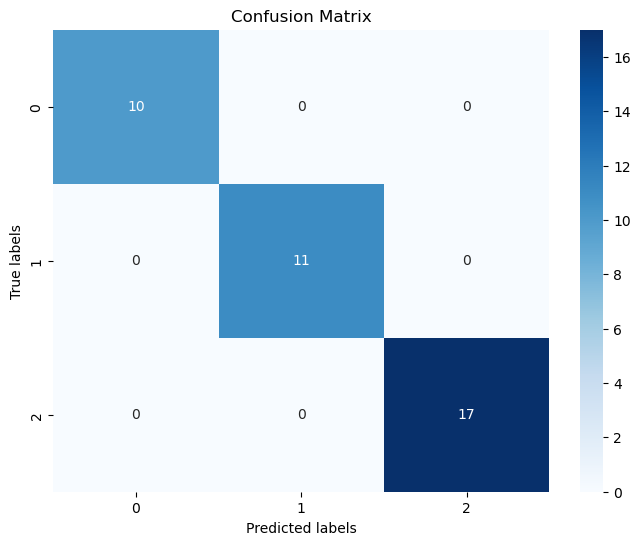

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [10]:
r = accuracy_score(y_test, y_pred)
print(r)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [11]:
!pip install mlxtend -q

# Импортируем функцию plot_decision_regions, 
# которая отрисует разделяющую границу:
from mlxtend.plotting import plot_decision_regions 

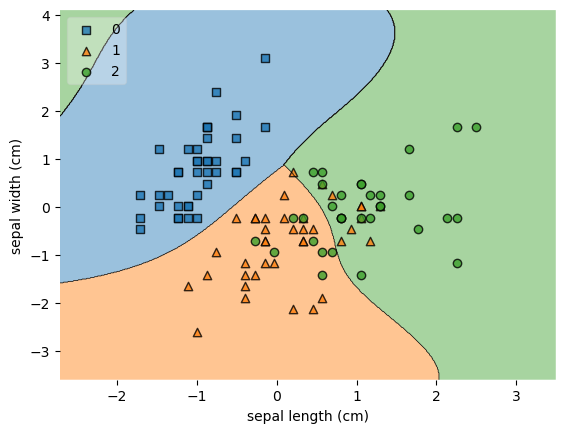

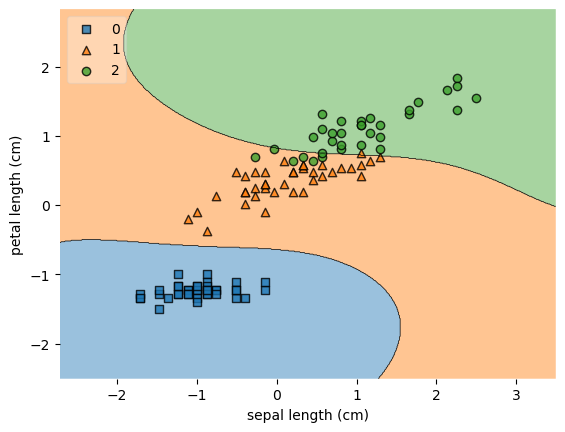

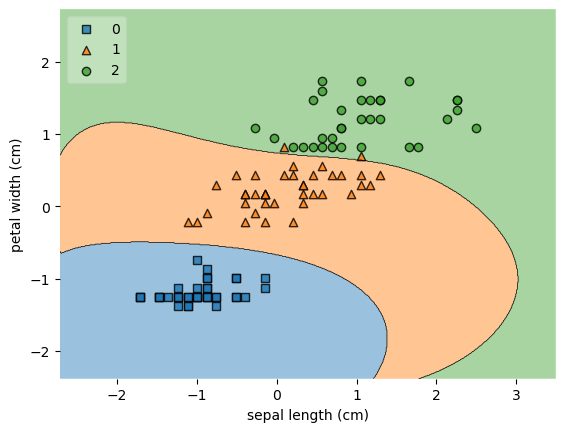

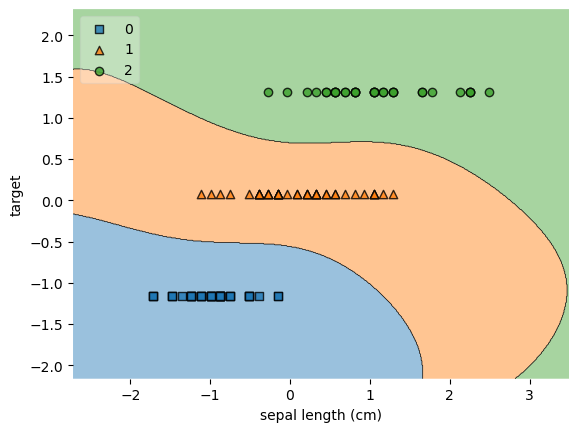

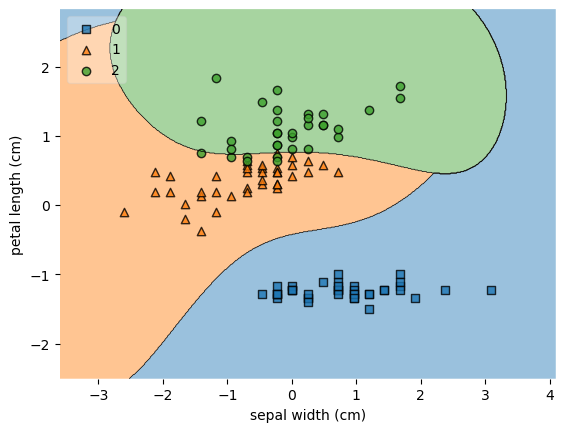

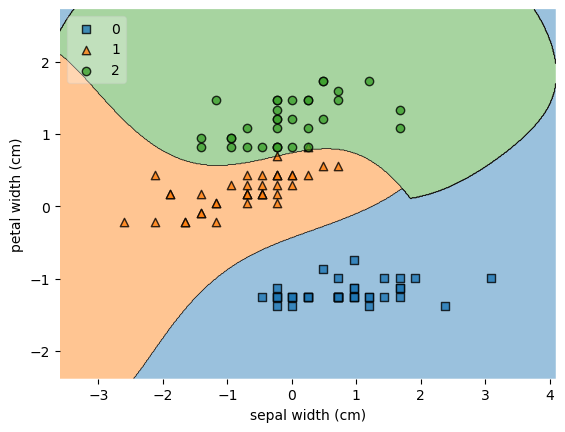

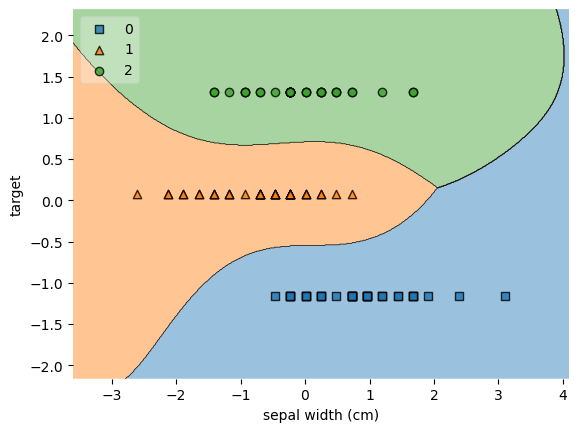

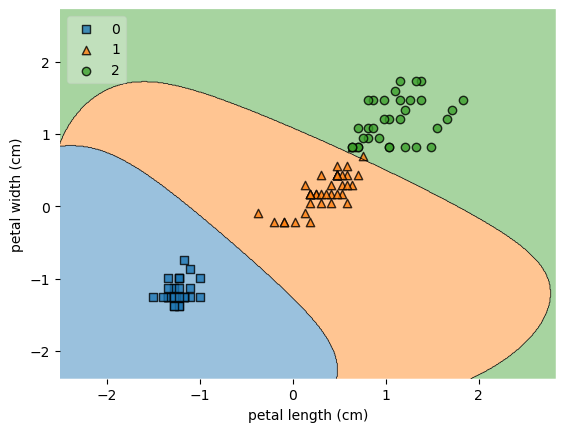

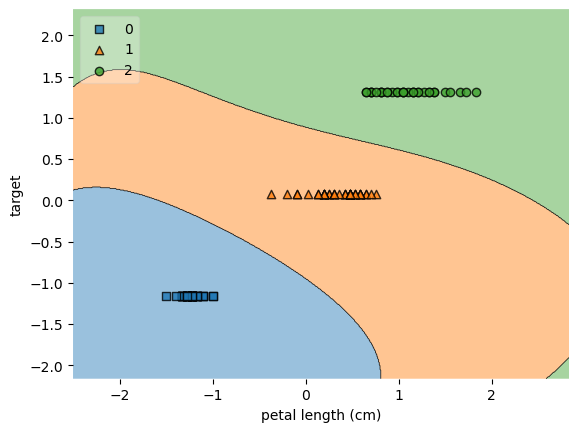

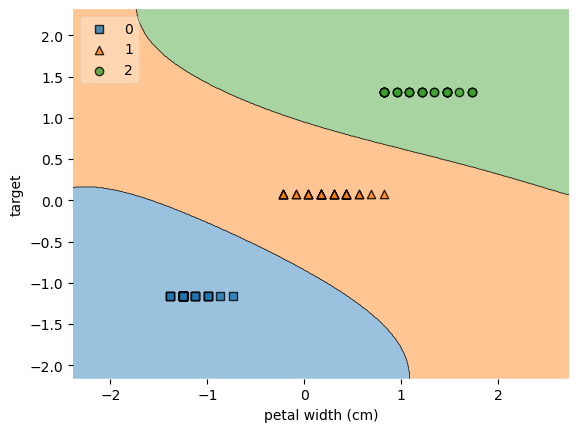

In [12]:
from itertools import combinations

columns = list(X_train.columns)
all_variants = list(combinations(columns, 2))

for i in range(len(all_variants)):
    model = SVC()
    X_new_train = X_train[[all_variants[i][0], all_variants[i][1]]]
    X_new_scalled = scaler.fit_transform(X_new_train)
    model.fit(X_new_scalled, y_train)
    a = plot_decision_regions(X_new_scalled, y_train.to_numpy(), clf=model, legend=2)
    plt.xlabel(all_variants[i][0])
    plt.ylabel(all_variants[i][1])
    plt.show() 

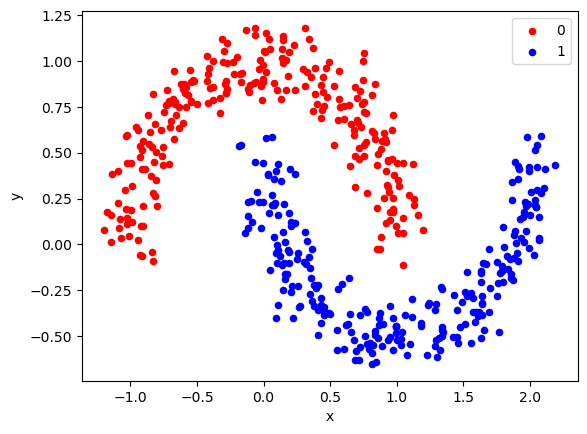

In [13]:
X, y = make_moons(n_samples=500, noise=0.1)
df_moon = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df_moon.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [14]:
target = df_moon.label
df_moon.drop(['label'], axis=1, inplace=True)
y = target
X = df_moon

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((400, 2), (100, 2))

In [16]:
clf_moon = SVC()

clf_moon.fit(X_train, y_train)
y_pred = clf_moon.predict(X_test)

1.0


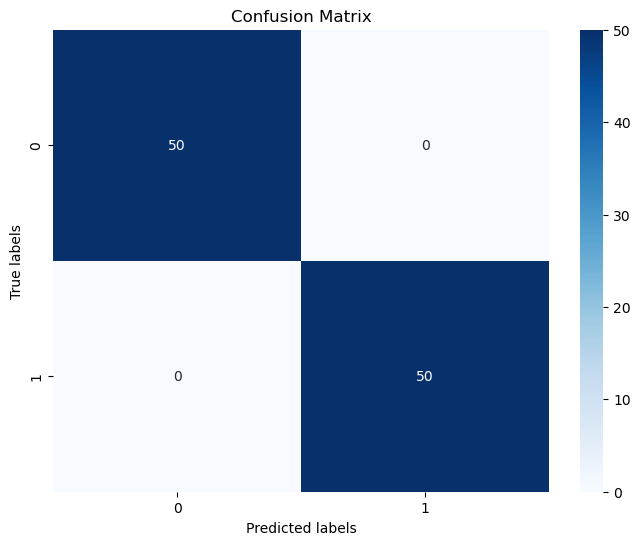

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [17]:
r = accuracy_score(y_test, y_pred)
print(r)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [18]:
feature1_index = 0
feature2_index = 1
x_min, x_max = X[:, feature1_index].min() - 1, X[:, feature1_index].max() + 1
y_min, y_max = X[:, feature2_index].min() - 1, X[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, feature1_index], X[:, feature2_index], c=y, s=20, edgecolor='k')
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title('SVM Classification (Iris Dataset)')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
from itertools import combinations

columns = list(X_train.columns)
all_variants = list(combinations(columns, 2))

for i in range(len(all_variants)):
    model = SVC(kernel='rbf')
    X_new_train = X_train[[all_variants[i][0], all_variants[i][1]]]
    X_new_scalled = scaler.fit_transform(X_new_train)
    model.fit(X_new_scalled, y_train)
    a = plot_decision_regions(X_new_scalled, y_train.to_numpy(), clf=model, legend=2)
    plt.xlabel(all_variants[i][0])
    plt.ylabel(all_variants[i][1])
    plt.show() 

In [ ]:
feature1_index = 0
feature2_index = 1

# Plot decision boundary
x_min, x_max = X[:, feature1_index].min() - 1, X[:, feature1_index].max() + 1
y_min, y_max = X[:, feature2_index].min() - 1, X[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, feature1_index], X[:, feature2_index], c=y, s=20, edgecolor='k')
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title('SVM Classification (Iris Dataset)')
plt.show()